In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve
from IPython.display import Image

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets...", end="")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.dirname(save_path))
        print("Done extracting the file")
    except Exception as e:
        print("\nInvalid File.", e)

URL = "https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")


if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

<class 'numpy.ndarray'>


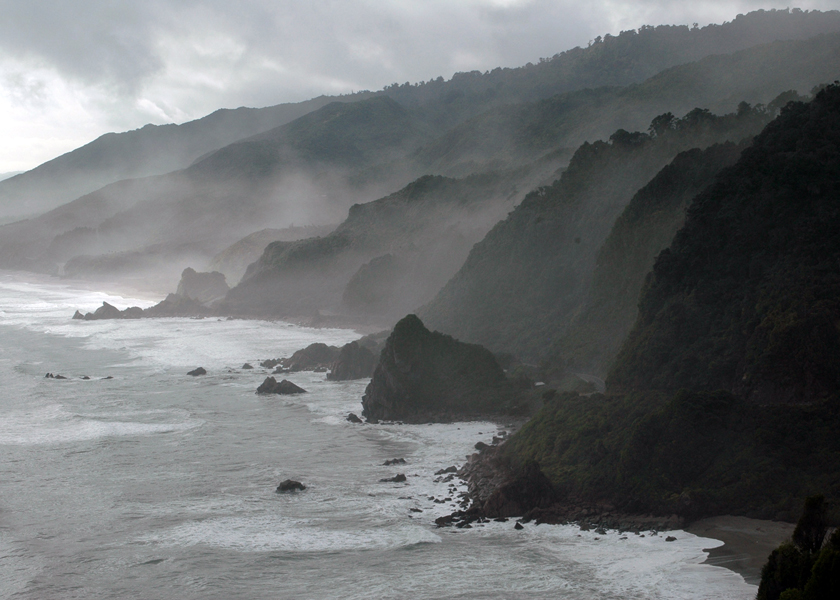

In [4]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print(type(img_rgb))
Image(filename="New_Zealand_Coast.jpg")

Text(0.5, 1.0, 'Brighter')

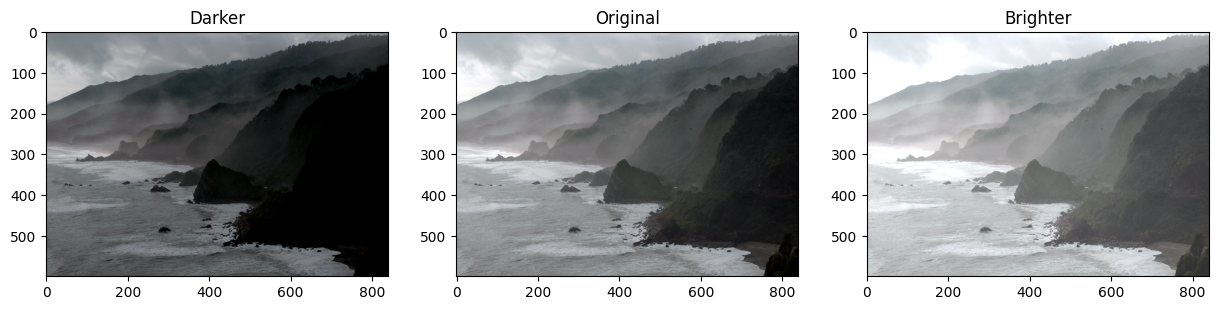

In [5]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(img_rgb_darker)
plt.title("Darker")

plt.subplot(132)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(133)
plt.imshow(img_rgb_brighter)
plt.title("Brighter")

Text(0.5, 1.0, 'Higher Contrast')

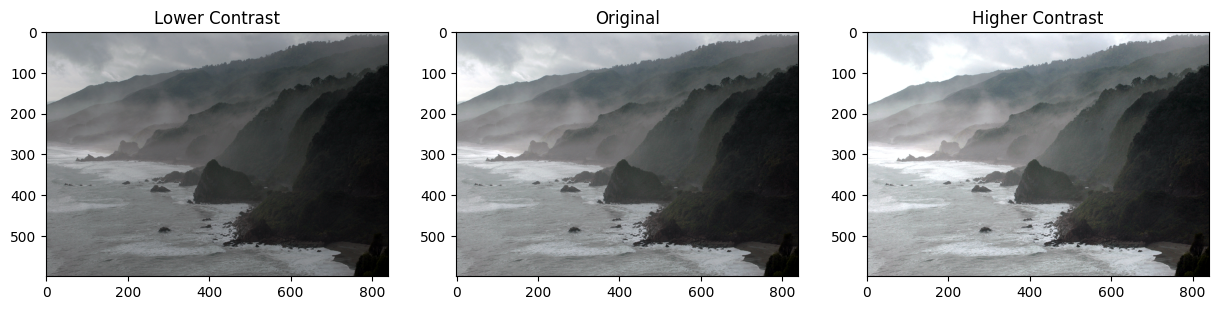

In [6]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8   # Value should be lower than 1 for low contrast
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2 # Value should be equal or greater than 1 for high contrast

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
# img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_high_contrast)) # causes values to overflow 255
img_rgb_brighter = np.uint8(np.clip (cv2.multiply(np.float64(img_rgb), matrix_high_contrast), 0, 255))


plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(img_rgb_darker)
plt.title("Lower Contrast")

plt.subplot(132)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(133)
plt.imshow(img_rgb_brighter)
plt.title("Higher Contrast")

(572, 800)


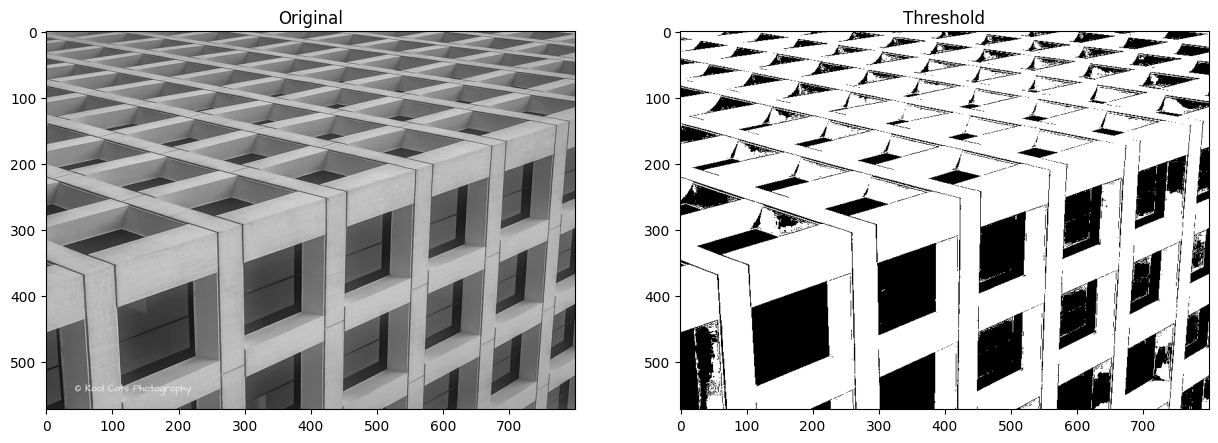

In [7]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[15, 5])

plt.subplot(121)
plt.imshow(img_read, cmap="gray")
plt.title("Original")

plt.subplot(122)
plt.imshow(img_thresh, cmap="gray")
plt.title("Threshold")

print(img_thresh.shape)

Text(0.5, 1.0, 'Thresholded (adaptive)')

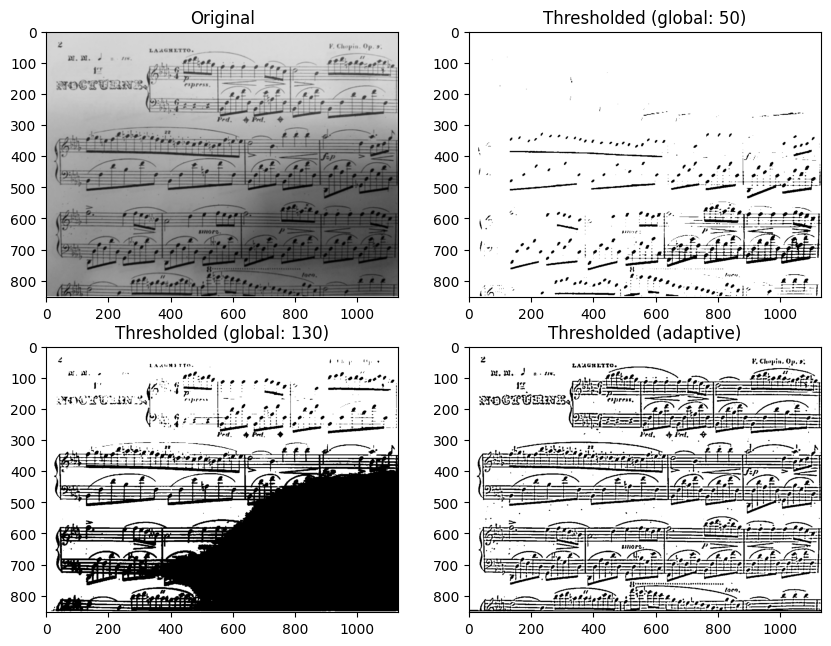

In [8]:
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)


plt.figure(figsize=[10, 15])

plt.subplot(121)
plt.imshow(img_read, cmap="gray")
plt.title("Original")

plt.subplot(122)
plt.imshow(img_thresh_gbl_1, cmap="gray")
plt.title("Thresholded (global: 50)")

plt.subplot(223)
plt.imshow(img_thresh_gbl_2, cmap="gray")
plt.title("Thresholded (global: 130)")

plt.subplot(224)
plt.imshow(img_thresh_adp, cmap="gray")
plt.title("Thresholded (adaptive)")

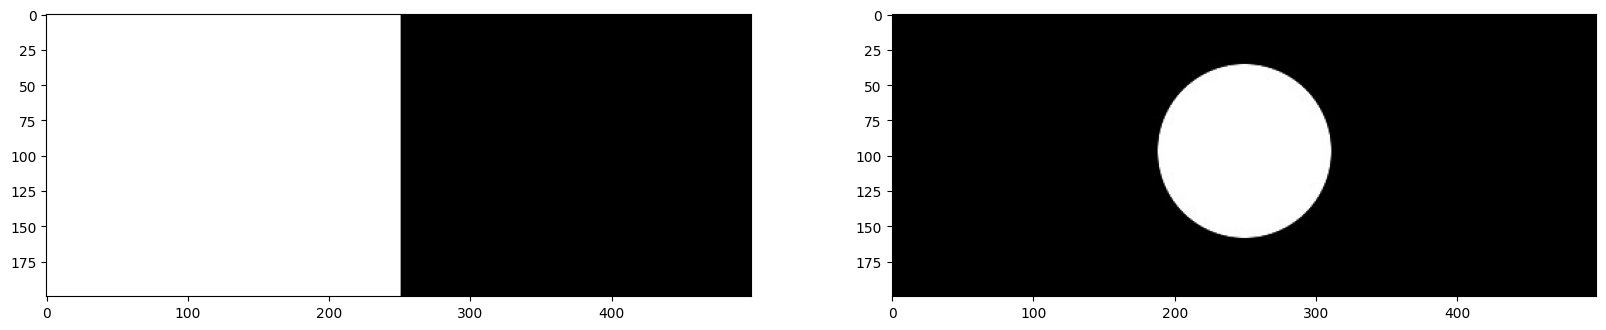

In [9]:
img_rect = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_circ = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])

plt.subplot(121)
plt.imshow(img_rect, cmap="gray")

plt.subplot(122)
plt.imshow(img_circ, cmap="gray")


Text(0.5, 1.0, 'Bitwise XOR (circ, rect)')

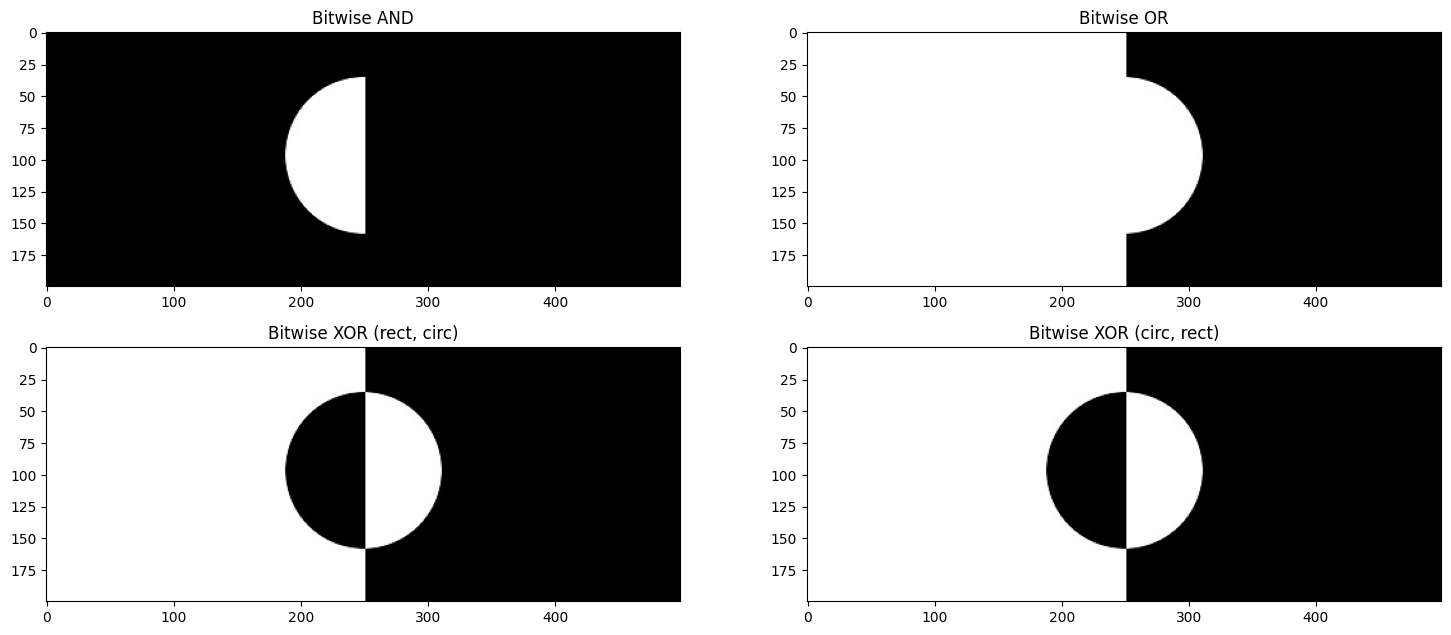

In [14]:
result1 = cv2.bitwise_and(img_rect, img_circ, mask=None)

result2 = cv2.bitwise_or(img_rect, img_circ, mask=None)

result3 = cv2.bitwise_xor(img_rect, img_circ, mask=None)

result4 = cv2.bitwise_xor(img_circ, img_rect, mask=None)

plt.figure(figsize=[18, 15])

plt.subplot(121)
plt.imshow(result1, cmap="gray")
plt.title("Bitwise AND")

plt.subplot(122)
plt.imshow(result2, cmap="gray")
plt.title("Bitwise OR")

plt.subplot(223)
plt.imshow(result3, cmap="gray")
plt.title("Bitwise XOR (rect, circ)")

plt.subplot(224)
plt.imshow(result4, cmap="gray")
plt.title("Bitwise XOR (circ, rect)")


(700, 700, 3)


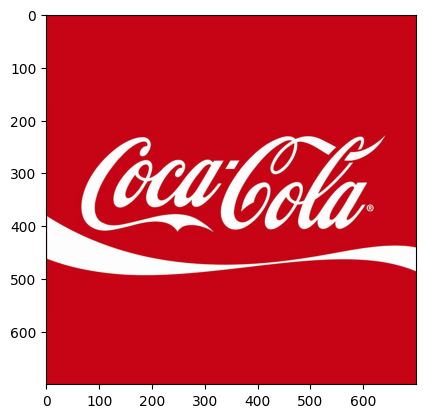

In [ ]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]

(700, 700, 3)


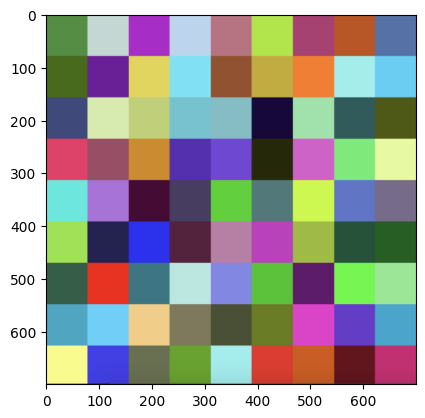

In [16]:
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

img_background_rgb = cv2.resize(img_background_rgb, dsize=(logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

(700, 700)


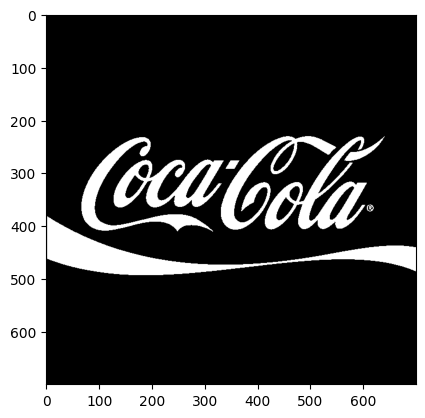

In [19]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

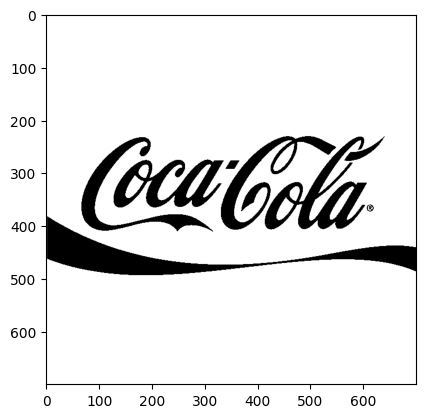

In [21]:

img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

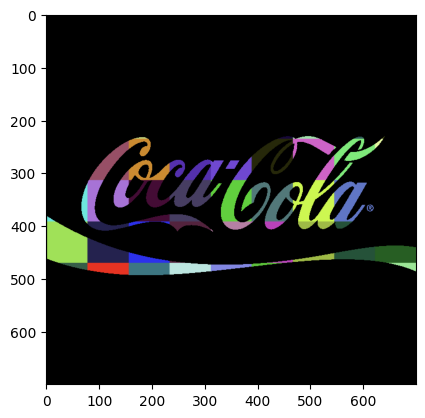

In [22]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

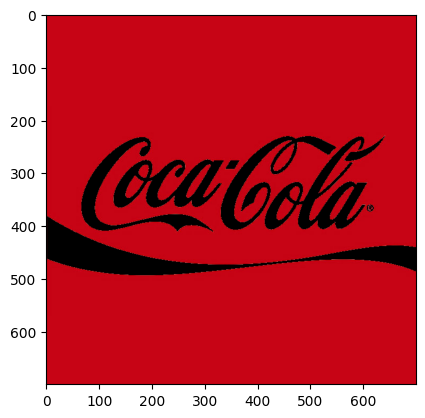

In [23]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

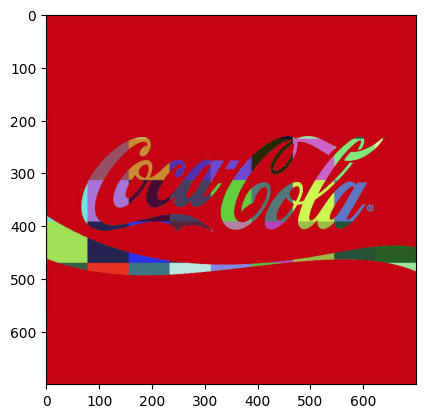

In [ ]:
result = cv2.add(img_background, img_foreground) # the reason why black is not seen becausse its pixel value is 0
plt.imshow(result)